In [49]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import yfinance as yf

msft = yf.download("MSFT")
msft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400


<AxesSubplot: >

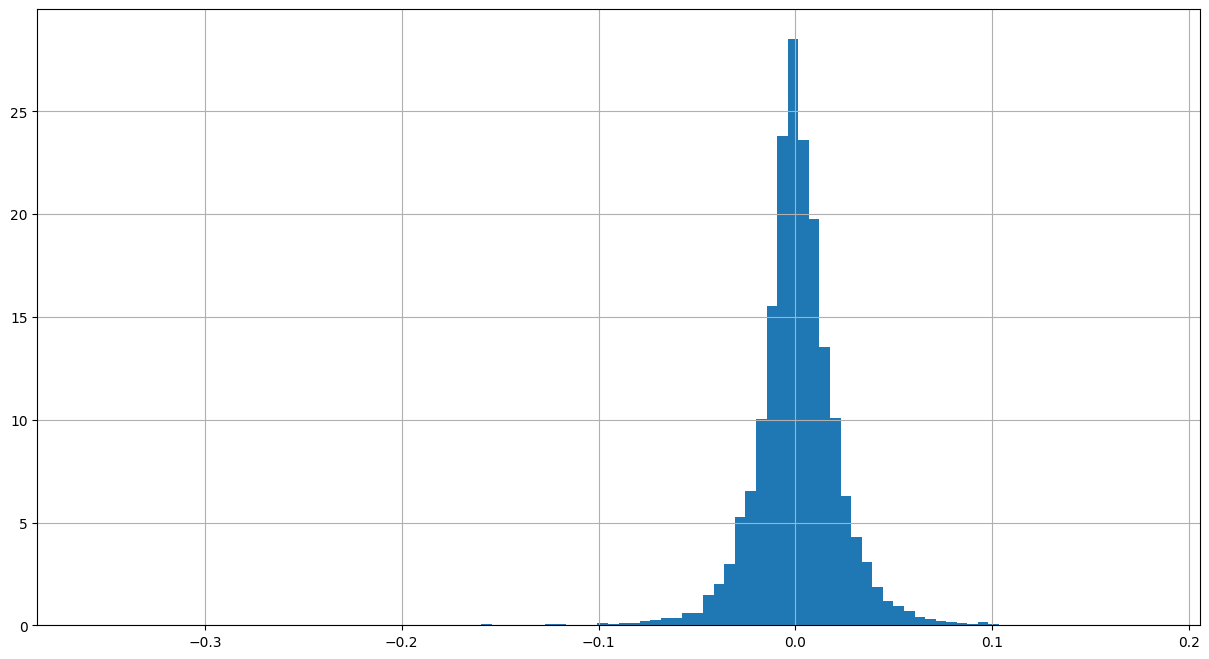

In [50]:
msft['Logreturns'] = np.log(msft['Close'].shift(-1)) - np.log(msft['Close'])

msft['Logreturns'].hist(bins=100, density=1,figsize=(15,8))

In [51]:
# Lets build 90% confidence interval for log return
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

sample_mean = msft['Logreturns'].mean()
sample_std = msft['Logreturns'].std(ddof=1) / (msft.shape[0]) ** 0.5

# upper and lower bound


interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

In [52]:
print('90% confidence interval is ', (interval_left, interval_right))
print('The sample mean is ', sample_mean)

90% confidence interval is  (0.0005767703777205741, 0.0011441600310194287)
The sample mean is  0.0008604652043700014
